# 词云

本文目录：

1. 最简单的词云
2. 几何形状的词云
3. 以 png 图片作遮罩的词云
4. 中文词云


## 1. 最简单的词云

因为中文词云在绘制之前，还需要多一个分词操作，更麻烦一些，因此先绘制英文词云。

参考教程： 

1. https://www.datacamp.com/community/tutorials/wordcloud-python

2. https://blog.csdn.net/sinat_29957455/article/details/81410966

首先确保你已经安装了必要的库，包括：

- NumPy
- matplotlib
- wordcloud
- jieba
- thulac


In [1]:
!pip install wordcloud

首先，打开存放文章的文件，打印出来看一下。

In [2]:
with open('./data/JasonBourne', encoding="utf8") as cur_file:
    text = cur_file.read()
    
print(text)

Jason Bourne is a 2016 American action thriller film directed by Paul Greengrass and written by Paul Greengrass and Christopher Rouse. It is the fifth and final installment of the Bourne film series and a direct sequel to The Bourne Ultimatum (2007). Matt Damon reprises his role as the main character, former CIA assassin Jason Bourne. In addition, the film stars Tommy Lee Jones, Alicia Vikander, Julia Stiles, Vincent Cassel, Riz Ahmed, Ato Essandoh and Scott Shepherd.

The character Aaron Cross, from The Bourne Legacy (2012), does not appear in the film because director Greengrass wanted to focus on the title character, and because actor Jeremy Renner was unable to participate due to scheduling conflicts. In Jason Bourne, Bourne remains on the run from CIA hit squads as he tries to uncover hidden truths about his father, while CIA director Robert Dewey (Jones) orders the head of cyber-security Heather Lee (Vikander) to hunt him down. Principal photography on the film commenced on Septe

绘制最简单的词云，只需要四行代码。

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

`WordCloud` 提供了一些参数，允许我们设置最大字号、词的数量、背景颜色等选项。

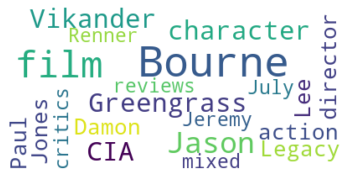

In [4]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 2. 几何形状的词云

甚至允许我们自定义遮罩。

如果我们希望词云呈一个椭圆的形状，那么我们需要先画一个椭圆。

根据椭圆公式：

$$\frac{x^{2}}{a^{2}}+\frac{y^{2}}{b^{2}}=1(a>b>0)$$

首先，我们来画一个椭圆。

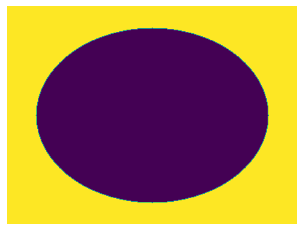

In [5]:
import numpy as np

# a = 120, b = 160
x,y = np.ogrid[:300,:400]
mask = ((x-150)/120) ** 2 + ((y-200)/160) ** 2 > 1
mask = 255 * mask.astype(int)
plt.imshow(mask, interpolation='bilinear')
plt.axis('off')
plt.show()

然后，我们将 `WordCloud` 的 `mask` 参数设为上述椭圆，就可以画出椭圆形的词云啦！

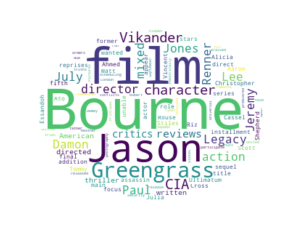

In [6]:
x,y = np.ogrid[:300,:400]
mask = ((x-150)/120) ** 2 + ((y-200)/160) ** 2 > 1
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", max_words=100, mask=mask)

wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. 以 png 图片作遮罩的词云

In [7]:
import numpy as np
from PIL import Image

wine_mask = np.array(Image.open("./data/wine_mask.png"))
wine_mask, wine_mask.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), (512, 512))

In [8]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_wine_mask = np.ndarray((wine_mask.shape[0], wine_mask.shape[1]), np.int32)
transformed_wine_mask, transformed_wine_mask.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32), (512, 512))

In [9]:
for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
transformed_wine_mask, transformed_wine_mask.shape

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32), (512, 512))

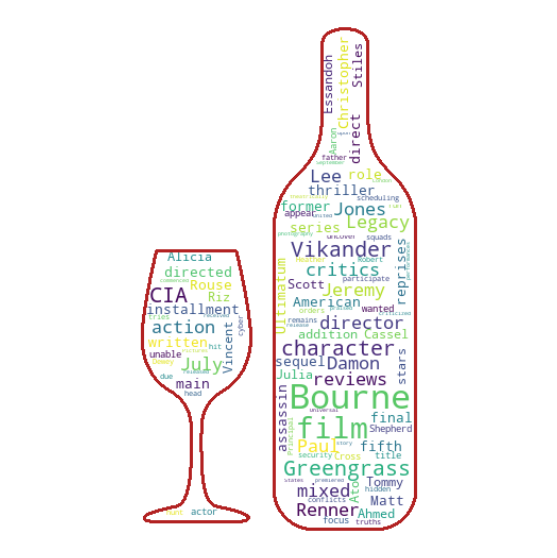

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(["jason", "now"])

wc = WordCloud(background_color="white", max_words=100, mask=transformed_wine_mask,
              stopwords=stopwords, contour_width=3, contour_color='firebrick')

wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

下面这句代码可以把词云存成图片。

In [11]:
wc.to_file("data/wine.png")

上面的代码是探索性的，主要是为了理解每一个中间过程。

为了让代码结构看起来明晰紧凑一点，下面又整理了一遍。

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

def draw_word_cloud(imgPath, text, save):
    
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    
    mask = np.array(Image.open(imgPath))
    nmask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)
    
    for i in range(len(mask)):
        nmask[i] = list(map(transform_format, mask[i]))
    
    wc = WordCloud(background_color="white", max_words=100, mask=nmask,
                   contour_width=3, contour_color='firebrick')

    wc.generate(text)

    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    if save:
        wc.to_file("data/figure.png")
        

In [13]:
# draw_word_cloud("./data/wine_mask.png" , text, False)

## 4. 中文词云

中文词云和英国词云的区别是：中文词云在绘制之前需要多做一个分词操作。

参考教程：https://zhuanlan.zhihu.com/p/28954970

有很多个分词库，这里测试了其中两个：

- jieba
- thulac

首先用 jieba 这个库来分词。

In [14]:
!pip install jieba

In [15]:
with open("./data/外汇期货", encoding="utf8" ) as cur_file:
    text = cur_file.read()
    
print(text)

外汇期货简称为FxFut，是“Forex Futures”的缩写，是在集中形式的期货交易所内，交易双方通过公开叫价，以某种非本国货币买进或卖出另一种非本国货币，并签订一个在未来的某一日期根据协议价格交割标准数量外汇的合约。为了说明方便，我们先把广义的外汇期货交易与狭义的外汇期货交易区别开来。广义的外汇期货交易，包括外汇期货合约交易和外汇期权合约交易二种方式，而狭义的外汇期货则专指外汇期货合约。外汇期货的主要的内容包括： ①交易单位。②最小变动价位。③每日价格最大波动限制。④合约月份。⑤交易时间。⑥最后交易日。⑦交割日期。⑧交割地点。

外汇期货交易是指在约定的日期，按照已经确定的汇率，用美元买卖一定数量的另一种货币。外汇期货买卖与合约现货买卖有共同点亦有不同点。合约现货外汇的买卖是通过银行或外汇交易公司来进行的，外汇期货的买卖是在专门的期货市场进行的。全世界的期货交易所主要有：芝加哥期货交易所、纽约商品交易所、悉尼期货交易所、新加坡期货交易所、伦敦期货交易所。期货市场至少要包括两个部分：一是交易市场，另一个是清算中心。期货的买方或卖方在交易所成交后，清算中心就成为其交易对方，直至期货合同实际交割为止。外汇期货和合约外汇交易既有一定的联系，在具体运作方式也有一定的区别。


In [16]:
import jieba

print(list(jieba.cut(text)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/zl/j3x1wlqx5pvfj7xhn77f2w1h0000gn/T/jieba.cache
Loading model cost 0.790 seconds.
Prefix dict has been built succesfully.


['外汇', '期货', '简称', '为', 'FxFut', '，', '是', '“', 'Forex', ' ', 'Futures', '”', '的', '缩写', '，', '是', '在', '集中', '形式', '的', '期货', '交易所', '内', '，', '交易', '双方', '通过', '公开', '叫价', '，', '以', '某种', '非', '本国货币', '买进', '或', '卖出', '另', '一种', '非', '本国货币', '，', '并', '签订', '一个', '在', '未来', '的', '某', '一', '日期', '根据', '协议', '价格', '交割', '标准', '数量', '外汇', '的', '合约', '。', '为了', '说明', '方便', '，', '我们', '先', '把', '广义', '的', '外汇', '期货交易', '与', '狭义', '的', '外汇', '期货交易', '区别', '开来', '。', '广义', '的', '外汇', '期货交易', '，', '包括', '外汇', '期货', '合约', '交易', '和', '外汇', '期权', '合约', '交易', '二种', '方式', '，', '而', '狭义', '的', '外汇', '期货', '则', '专指', '外汇', '期货', '合约', '。', '外汇', '期货', '的', '主要', '的', '内容', '包括', '：', ' ', '①', '交易', '单位', '。', '②', '最小', '变动', '价位', '。', '③', '每日', '价格', '最大', '波动', '限制', '。', '④', '合约', '月份', '。', '⑤', '交易', '时间', '。', '⑥', '最后', '交易日', '。', '⑦', '交割', '日期', '。', '⑧', '交割', '地点', '。', '\n', '\n', '外汇', '期货交易', '是', '指', '在', '约定', '的', '日期', '，', '按照', '已经', '确定', '的', '汇率', '，', '用', '美元', '买卖', 

In [17]:
ntext = " ".join(jieba.cut(text))
ntext

'外汇 期货 简称 为 FxFut ， 是 “ Forex   Futures ” 的 缩写 ， 是 在 集中 形式 的 期货 交易所 内 ， 交易 双方 通过 公开 叫价 ， 以 某种 非 本国货币 买进 或 卖出 另 一种 非 本国货币 ， 并 签订 一个 在 未来 的 某 一 日期 根据 协议 价格 交割 标准 数量 外汇 的 合约 。 为了 说明 方便 ， 我们 先 把 广义 的 外汇 期货交易 与 狭义 的 外汇 期货交易 区别 开来 。 广义 的 外汇 期货交易 ， 包括 外汇 期货 合约 交易 和 外汇 期权 合约 交易 二种 方式 ， 而 狭义 的 外汇 期货 则 专指 外汇 期货 合约 。 外汇 期货 的 主要 的 内容 包括 ：   ① 交易 单位 。 ② 最小 变动 价位 。 ③ 每日 价格 最大 波动 限制 。 ④ 合约 月份 。 ⑤ 交易 时间 。 ⑥ 最后 交易日 。 ⑦ 交割 日期 。 ⑧ 交割 地点 。 \n \n 外汇 期货交易 是 指 在 约定 的 日期 ， 按照 已经 确定 的 汇率 ， 用 美元 买卖 一定 数量 的 另 一种 货币 。 外汇 期货 买卖 与 合约 现货 买卖 有 共同点 亦 有 不同点 。 合约 现货 外汇 的 买卖 是 通过 银行 或 外汇交易 公司 来 进行 的 ， 外汇 期货 的 买卖 是 在 专门 的 期货市场 进行 的 。 全世界 的 期货 交易所 主要 有 ： 芝加哥 期货 交易所 、 纽约商品交易所 、 悉尼 期货 交易所 、 新加坡 期货 交易所 、 伦敦 期货 交易所 。 期货市场 至少 要 包括 两个 部分 ： 一是 交易市场 ， 另 一个 是 清算 中心 。 期货 的 买方 或 卖方 在 交易所 成交 后 ， 清算 中心 就 成为 其 交易 对方 ， 直至 期货 合同 实际 交割 为止 。 外汇 期货 和 合约 外汇交易 既有 一定 的 联系 ， 在 具体 运作 方式 也 有 一定 的 区别 。'

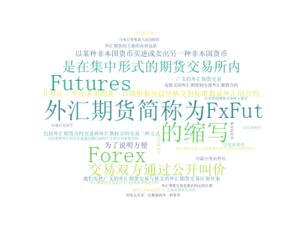

In [18]:
import matplotlib.pyplot as plt 
import matplotlib

x,y = np.ogrid[:300,:400]
mask = ((x-150)/120) ** 2 + ((y-200)/160) ** 2 > 1
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", max_words=30, mask=mask, font_path="./data/simsun.ttf",)

wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

再用 thulac 库来分词。

更多关于 thelac 的信息：http://thulac.thunlp.org/

In [19]:
!pip install thulac

In [20]:
import thulac   

thu1 = thulac.thulac()  #默认模式
text = thu1.cut("我爱北京天安门", text=True)  #进行一句话分词
print(text)

Model loaded succeed
我_r 爱_v 北京_ns 天安门_ns


In [21]:
thu1 = thulac.thulac(seg_only=True)
text = thu1.cut("我爱北京天安门", text=True)  #进行一句话分词
print(text)

Model loaded succeed
我 爱 北京 天安门


In [22]:
with open("./data/外汇期货", encoding="utf8" ) as cur_file:
    text = cur_file.read()
    
thu1 = thulac.thulac(seg_only=True)
text = thu1.cut(text, text=True)
text

Model loaded succeed


'外汇 期货 简称 为 FxFut ， 是 “ Forex Futures ” 的 缩写 ， 是 在 集中 形式 的 期货 交易所 内 ， 交易 双方 通过 公开 叫 价 ， 以 某种 非 本国 货币 买进 或 卖 出 另 一 种 非 本国 货币 ， 并 签订 一个 在 未 来 的 某 一 日期 根据 协议 价 格 交割 标准 数量 外汇 的 合约 。 为 了 说明 方便 ， 我们 先 把 广义 的 外汇 期货 交易 与 狭义 的 外汇 期货 交易 区别 开 来 。 广义 的 外汇 期货 交易 ， 包括 外汇 期货 合约 交易 和 外汇 期权 合约 交易 二 种 方式 ， 而 狭义 的 外汇 期货 则 专指 外汇 期货 合约 。 外汇 期货 的 主要 的 内容 包括 ： ① 交易 单位 。 ② 最 小 变动 价 位 。 ③ 每日 价 格 最 大 波动 限制 。 ④合 约月份 。 ⑤ 交易 时间 。 ⑥ 最后 交易日 。 ⑦ 交割 日期 。 ⑧ 交割 地点 。\n外汇 期货 交易 是 指 在 约定 的 日期 ， 按照 已经 确定 的 汇率 ， 用 美元 买卖 一定 数量 的 另 一 种 货币 。 外汇 期货 买卖 与 合约 现货 买卖 有 共同点 亦 有 不 同 点 。 合约 现货 外汇 的 买卖 是 通过 银行 或 外汇 交易 公司 来 进行 的 ， 外汇 期货 的 买卖 是 在 专门 的 期货 市场 进行 的 。 全世界 的 期货 交易所 主要 有 ： 芝加哥 期货 交易所 、 纽约 商品 交易所 、 悉尼 期货 交易所 、 新加坡 期货 交易所 、 伦敦 期货 交易所 。 期货 市场 至少 要 包括 两 个 部分 ： 一 是 交易 市场 ， 另 一个 是 清算 中心 。 期货 的 买方 或 卖方 在 交易所 成交 后 ， 清算 中心 就 成为 其 交易 对方 ， 直至 期货 合同 实际 交割 为止 。 外汇 期货 和 合约 外汇 交易 既 有 一定 的 联系 ， 在 具体 运作 方式 也 有 一定 的 区别 。'

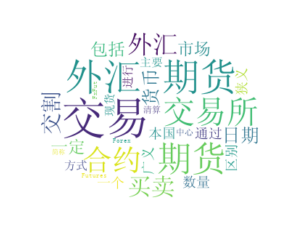

In [23]:
import matplotlib.pyplot as plt 
import matplotlib

x,y = np.ogrid[:300,:400]
mask = ((x-150)/120) ** 2 + ((y-200)/160) ** 2 > 1
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", max_words=30, mask=mask, font_path="./data/simsun.ttf",)

wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()